In [17]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.stats import bernoulli
sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt")
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")

is_mega = counts.columns.str.contains('Megalaima')
sites['has_mega'] = counts.loc[:,is_mega].sum(axis=1) > 0

Using the same linear model for has_mega  fixed intercept of 3.6, try 100 different values for the slope between -.005 and +.005. For each slope, calculate the likelihood of the has_megalaima observations. Plot slope versus the likelihood of the observations given that slope.

In [18]:
slopes = np.linspace(-0.005, 0.005, 100)
intercept = 3.6
data = {
    'slope':[],
    'lky':[]
}

for slope in slopes:
    pred_odds = sites['Elevation'] * slope + intercept
    # uses slope and intercept of log odds to create a linear log odds model

    pred_prob = 1 / (1 + np.exp(-1 * pred_odds))
    # form our liner log odds model we create a logarithmic probability model

    arr = bernoulli(p=pred_prob).pmf(sites['has_mega'])
    # using bernoulli we find the probability of the observations

    log = np.log(arr)
    # we take the log of the probabilities

    data['lky'].append(log.sum())
    data['slope'].append(slope)
    # we sum the logs to get likelihood and add it to our data dictionary with the slope

data = pd.DataFrame(data)

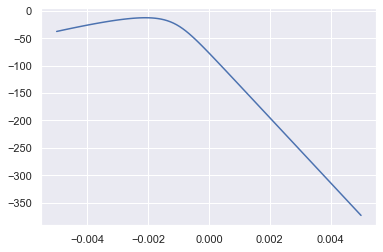

In [19]:
plt.plot(data['slope'], data['lky'])
plt.show()
# plots slope vs likelihood